In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa import stattools
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import TimeSeriesKMeans
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa import ar_model
from statsmodels.tsa.arima_model import ARIMA

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
def convert_datetime(name):
    json = pd.read_json('../data/download_testing/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_star_week_datatime(name):
  name = name.split('/')
  fname = 'data/stars/' + name[0] +'_' + name[1] + '_stars.json'
  pkg = pd.read_json(fname)
  pkg = pd.Series(pd.to_datetime(pkg['staredAts'])).dt.date
  github_life = np.arange('2016-09-04', '2019-09-02', dtype='datetime64[D]')
  github_life = pd.Series(github_life, name='t').dt.date
  star_counts = []
  for d in github_life:
    count = pkg[pkg == d].count()
    star_counts.append(count)
  starsCount = pd.Series(star_counts, index=pd.date_range('2016-09-04', '2019-09-01'))
  return round(starsCount.resample(rule='W').mean())

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

def convert_arima(name):
    df_w = convert_week_datetime(name)
    v = df_w['downloads']
    v104 = v[:104].values
    ts = sm.tsa.seasonal_decompose(v104, freq=52)
    seri = pd.Series(ts.trend).dropna()
    seri = pd.Series(seri.values)
    model_d0 = ARIMA(seri, (5, 2, 1))
    results_d0 = model_d0.fit()
    res_d0 = results_d0.resid
    ts = sm.tsa.seasonal_decompose(v.values, freq=52)
    gens = pd.Series(ts.trend).dropna()
    gens = pd.Series(gens.values)
    plt.figure()
    plt.title(name)
    plt.plot(gens, label='observation')
    plt.plot(results_d0.predict(2, len(gens), typ="levels").values, 
         '--', label='forecast')
    plt.show()


head 1.6881163948658295
tail 1.621453371456473


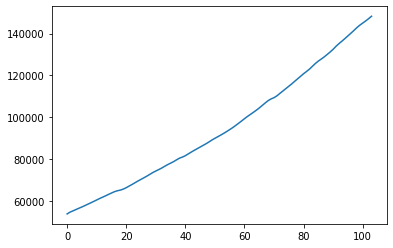

In [221]:
mocha = convert_ts('jasmine')
mocha = mocha.trend[26:130]
# mocha = mocha[78:130]
print('head',mocha[51] /  mocha[0] )
print('tail', mocha[103] / mocha[52] )
plt.plot(mocha)

latast head 10576.211538461539
latast tail 18419.5576923077
head 1.8512068155922492
tail 1.7238240931546793


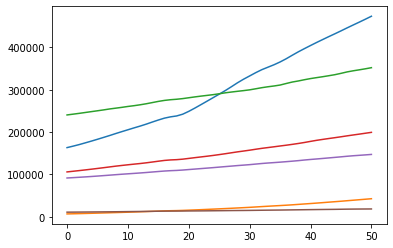

In [223]:
tops = ['jest', "cypress", "mocha", "enzyme", "jasmine", "ava"]
top_ts = convert_ts(tops[5])
top_ts = top_ts.trend[26:130]
print('latast head', top_ts[51])
print('latast tail', top_ts[103])
print('head',top_ts[51] /  top_ts[0] )
print('tail', top_ts[103] / top_ts[52] )

for i in tops:
    trend = convert_ts(i)
    trend = trend.trend[26:130]
    trend = trend[52:103]
    plt.plot(trend)

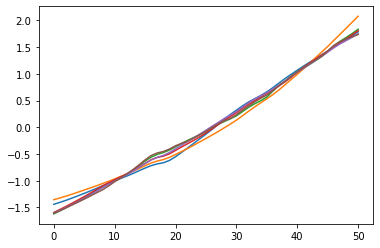

In [228]:
for i in tops:
    trend = convert_ts(i)
    trend = trend.trend[26:130]
    trend = trend[52:103]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(trend).flatten()
    plt.plot(d)

In [27]:
packages1000 =  pd.read_json('../data/all_packages/1000.json')
packages1000['packages'][0]



'chai'

In [30]:
packages400 =  pd.read_json('../data/assets/testing_packages.json')
packages400['packages'][200]

'mock-request'

In [41]:
data = packages400['packages']
print(len(data))
count = 0
for i in data:
    try:
        median = convert_week_datetime(i).median()
#         print(median)
        if median['downloads'] >= 1:
#             print(i)
            print(median['downloads'])
#         if median['downloads'] >= 50 and median['downloads'] <= 1000:
#             print(i)
    except:
        median = 0

400
205560.0
162229.0
127395.0
173968.0
103165.0
124686.0
47793.0
52932.0
26018.0
69652.0
210442.0
55117.0
43003.0
35768.0
43720.0
8036.0
5988.0
9848.0
10657.0
57501.0
5827.0
12399.0
4424.0
5179.0
57685.0
13527.0
22871.0
59909.0
38337.0
20632.0
9001.0
63892.0
9473.0
52554.0
49380.0
6843.0
12821.0
4617.0
2686.0
4168.0
5415.0
14193.0
9729.0
1792.0
8690.0
1564.0
77.0
10475.0
10947.0
3672.0
1487.0
9691.0
5961.0
3376.0
3214.0
3086.0
1705.0
7859.0
2507.0
4604.0
9442.0
2865.0
2501.0
400.0
2225.0
4054.0
2810.0
5224.0
2927.0
228.0
7341.0
4283.0
662.0
3022.0
639.0
113.0
3735.0
496.0
758.0
481.0
1909.0
7803.0
3557.0
466.0
19187.0
1078.0
809.0
611.0
297.0
434.0
912.0
1573.0
1764.0
74.0
3410.0
2183.0
504.0
315.0
387.0
2185.0
200.0
1705.0
10056.0
805.0
2.0
9499.0
33.0
259.0
1046.0
328.0
1121.0
371.0
9420.0
1982.0
260.0
411.0
68.0
1638.0
418.0
284.0
1578.0
469.0
6617.0
1764.0
72.0
224.0
541.0
119.0
516.0
1537.0
9.0
1687.0
122.0
258.0
48.0
3.0
315.0
375.0
856.0
63.0
1219.0
3886.0
685.0
29.0
903.0
38.0

In [125]:
# latast
data = packages400['packages']
# print(len(data))
count = 0
for i in data:
    try:
        df = convert_week_datetime(i)
        median = convert_week_datetime(i).median()
#         print(median)
        if median['downloads'] >= 1:
            print(df['downloads']['2019-09-01'])
#             print(i)
#             print(median['downloads'])
#         if median['downloads'] >= 50 and median['downloads'] <= 1000:
#             print(i)
    except:
        median = 0

390427.0
680622.0
212625.0
691979.0
260060.0
190756.0
125020.0
137397.0
188046.0
136436.0
412674.0
236200.0
73146.0
127696.0
60727.0
68217.0
83775.0
34035.0
22406.0
143985.0
16278.0
20978.0
119248.0
16331.0
239798.0
41125.0
27479.0
208896.0
44690.0
28972.0
37062.0
124875.0
13373.0
122557.0
123258.0
13344.0
17300.0
6569.0
16462.0
20183.0
14604.0
20296.0
24428.0
4752.0
12664.0
2793.0
14817.0
18531.0
22676.0
14603.0
1971.0
12467.0
7247.0
10481.0
2386.0
8264.0
3957.0
12464.0
13491.0
7893.0
36603.0
4803.0
1973.0
4244.0
3627.0
6823.0
5094.0
7827.0
5194.0
12850.0
7623.0
7384.0
1426.0
6442.0
2655.0
6464.0
3617.0
1182.0
1091.0
1736.0
7185.0
8892.0
4199.0
2321.0
44529.0
1309.0
1671.0
2699.0
334.0
894.0
2374.0
2065.0
3882.0
1076.0
3108.0
3182.0
1635.0
2260.0
2249.0
2064.0
5269.0
7037.0
24929.0
896.0
3334.0
24412.0
4019.0
653.0
3736.0
392.0
1790.0
776.0
24103.0
3684.0
1469.0
8492.0
3802.0
3172.0
4303.0
1321.0
2102.0
917.0
7390.0
1462.0
648.0
677.0
3623.0
949.0
825.0
1661.0
2202.0
3592.0
86.0
826.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


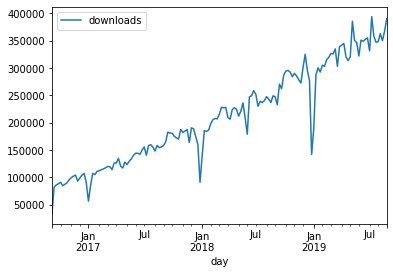

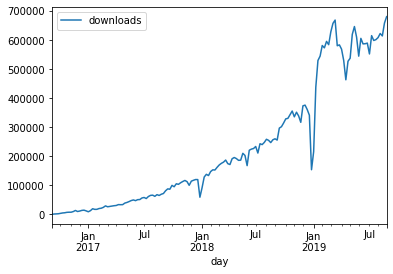

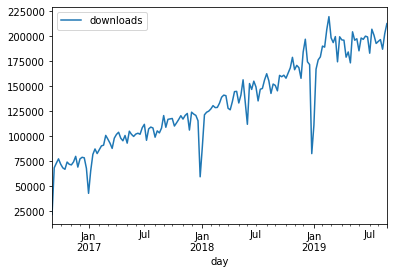

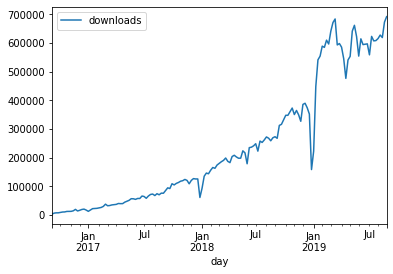

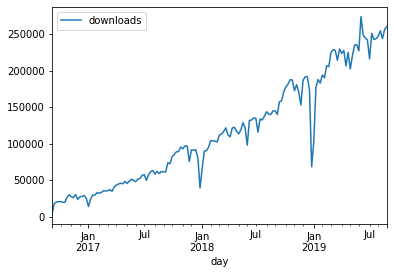

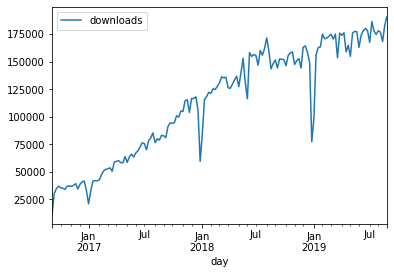

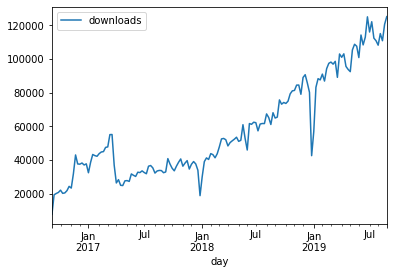

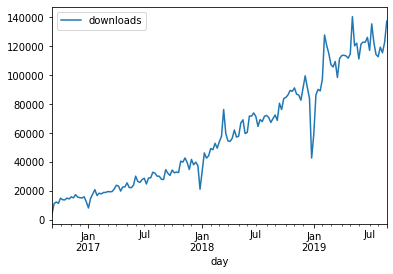

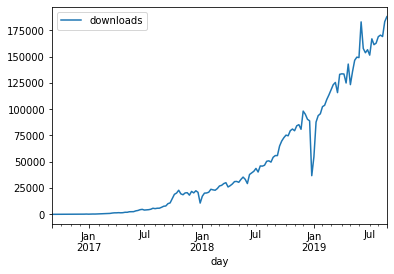

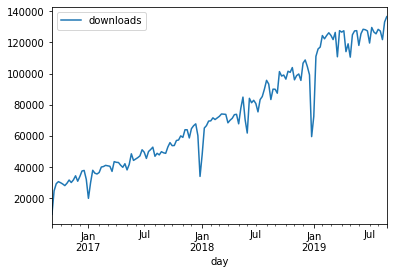

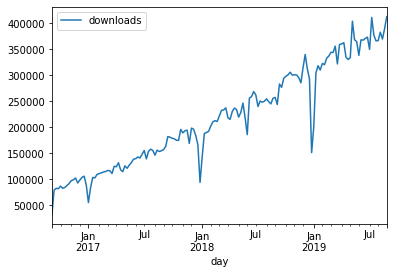

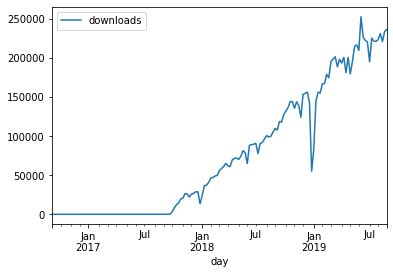

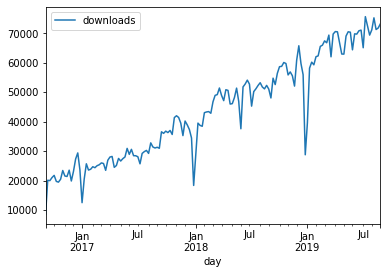

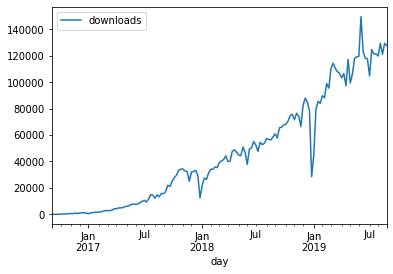

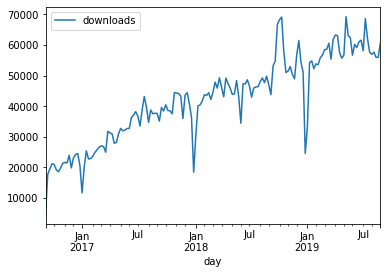

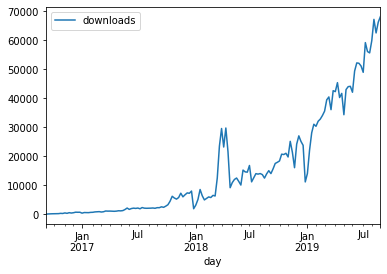

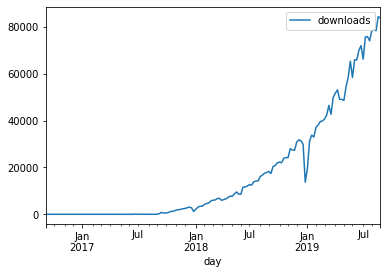

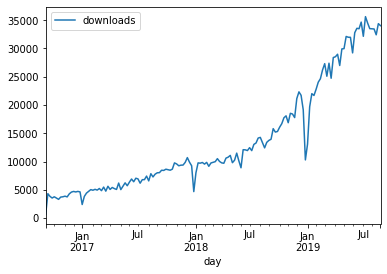

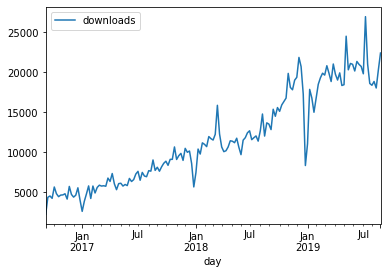

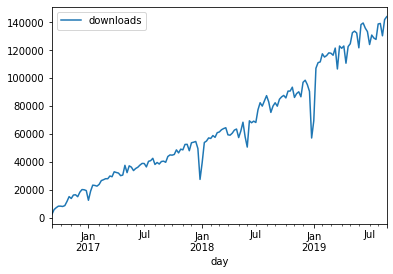

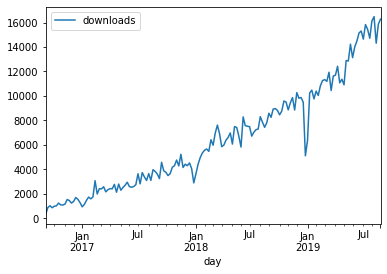

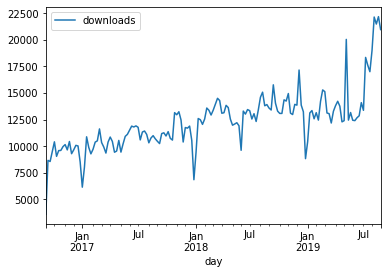

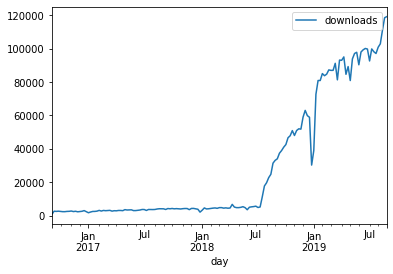

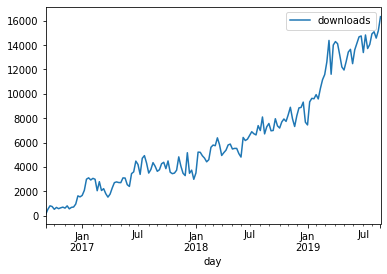

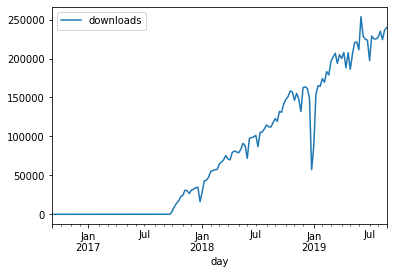

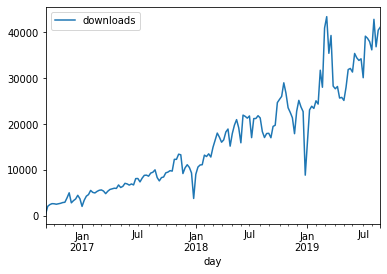

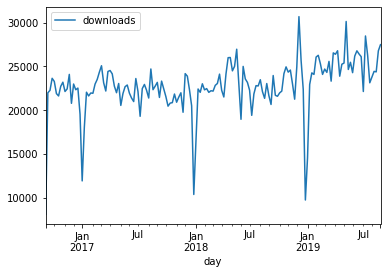

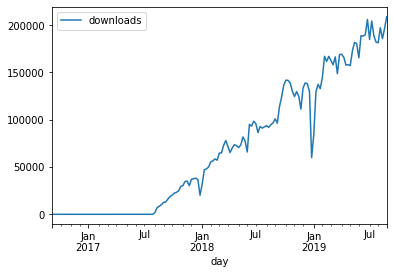

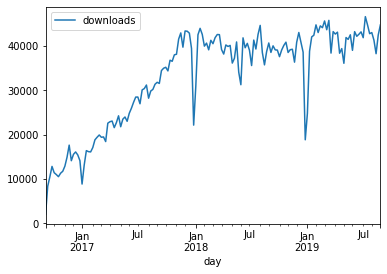

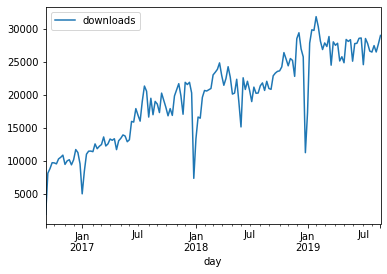

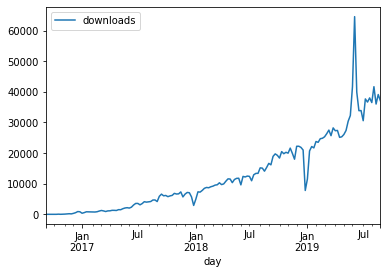

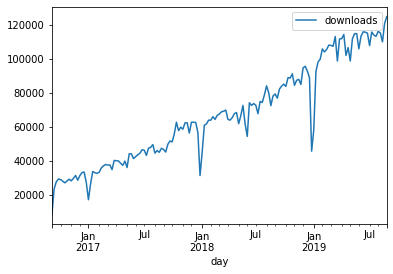

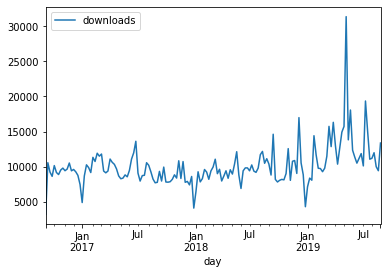

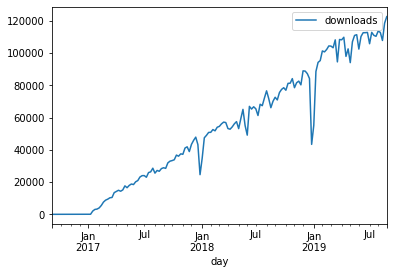

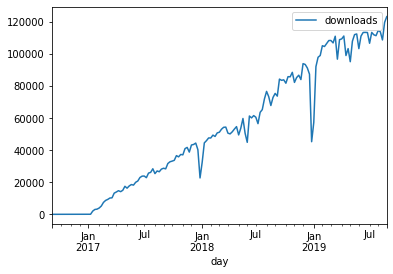

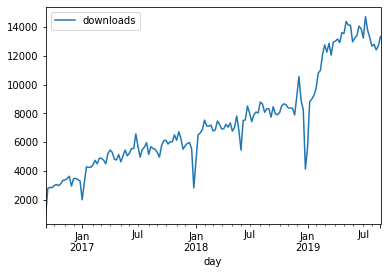

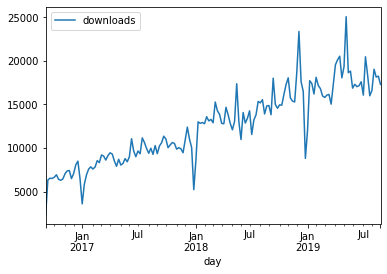

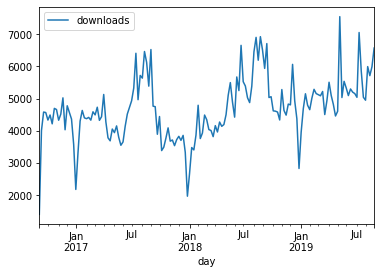

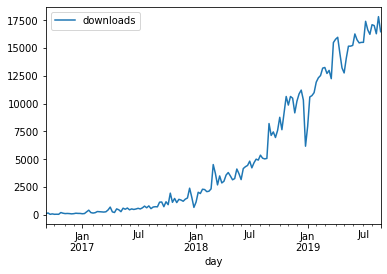

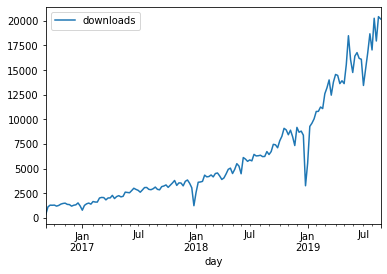

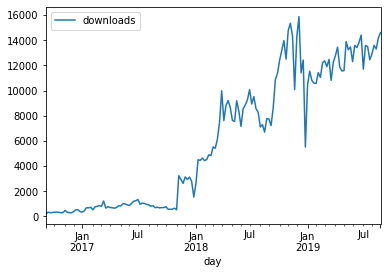

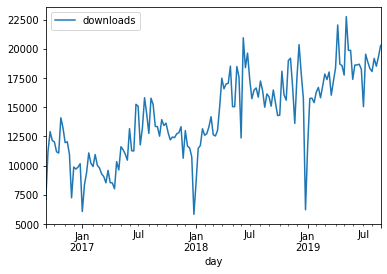

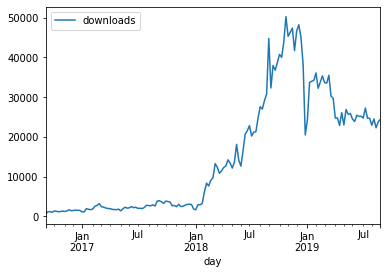

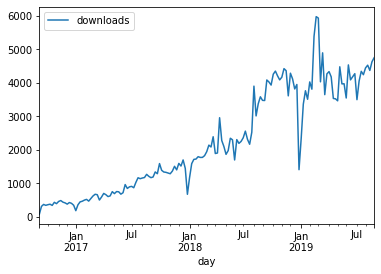

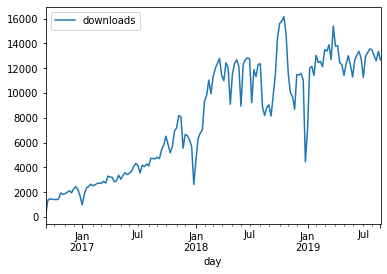

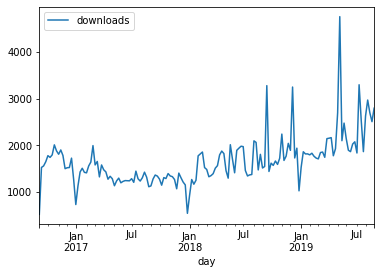

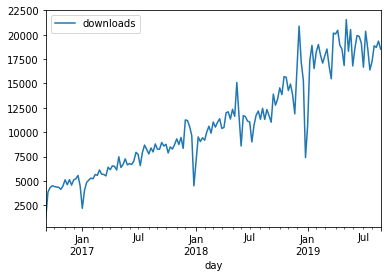

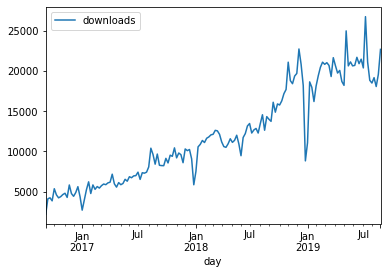

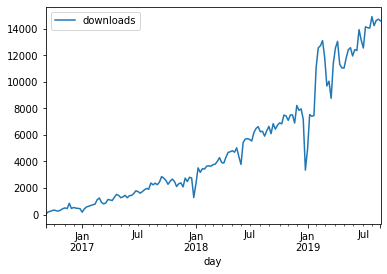

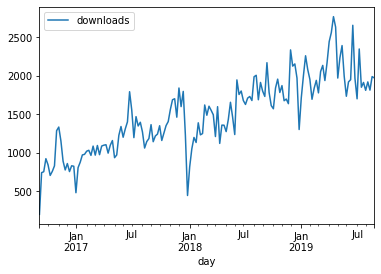

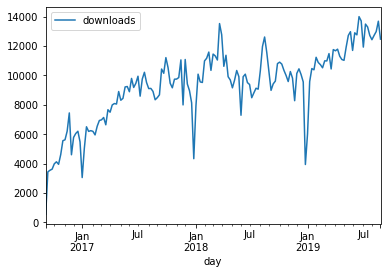

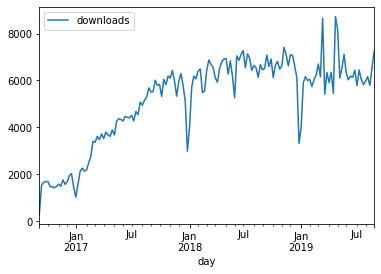

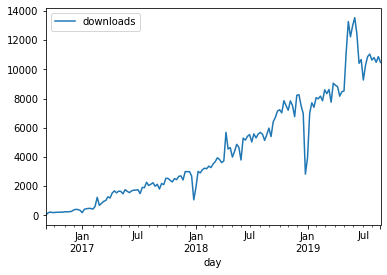

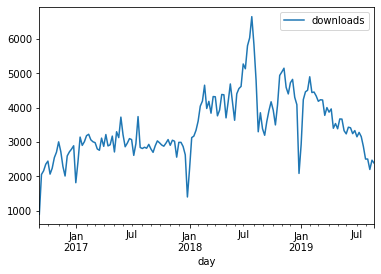

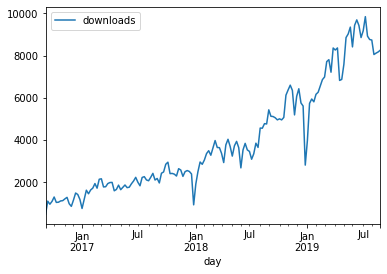

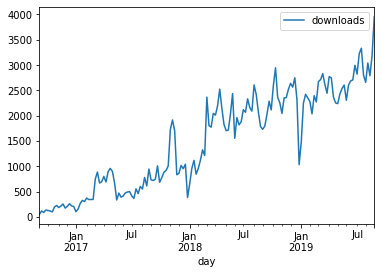

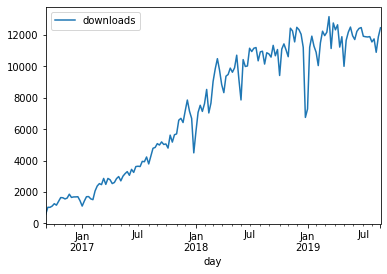

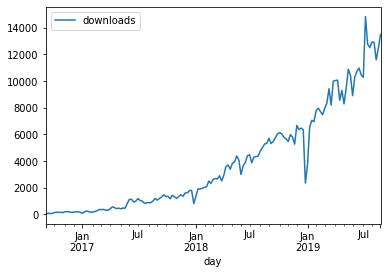

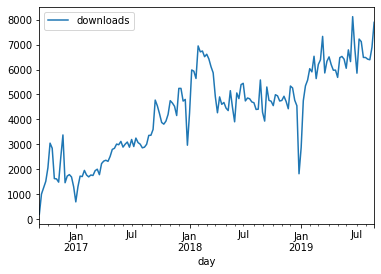

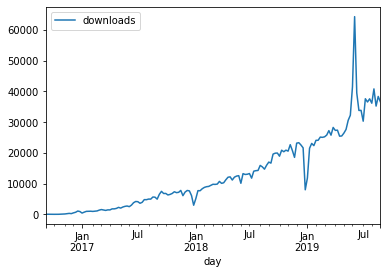

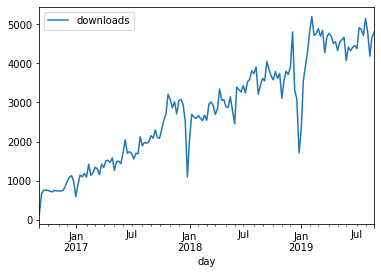

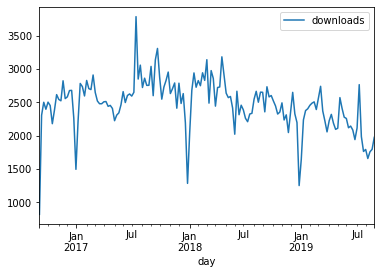

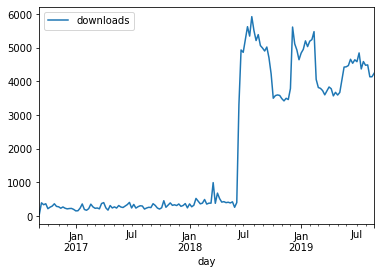

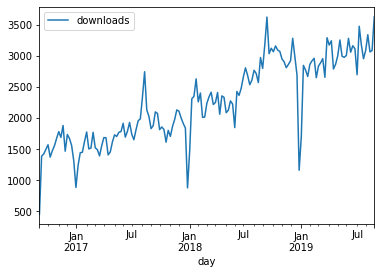

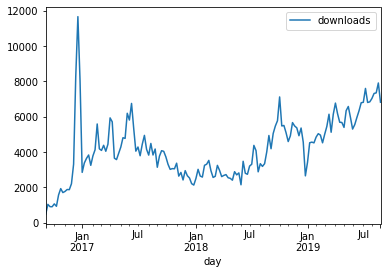

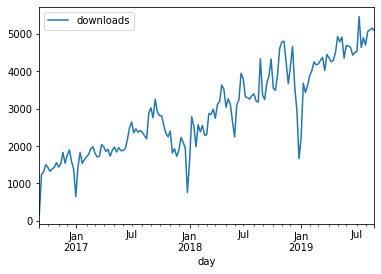

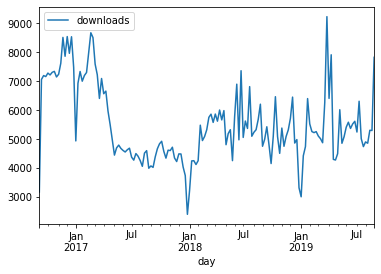

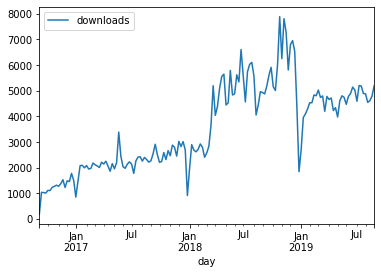

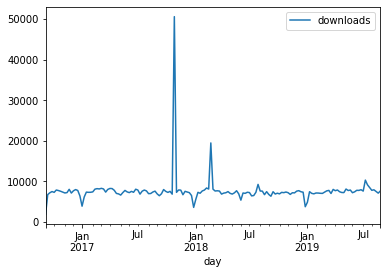

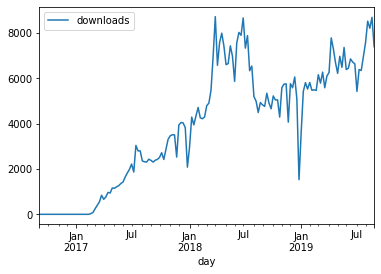

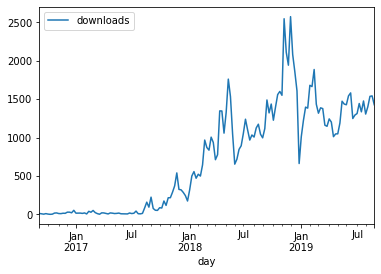

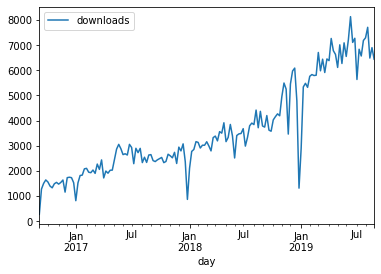

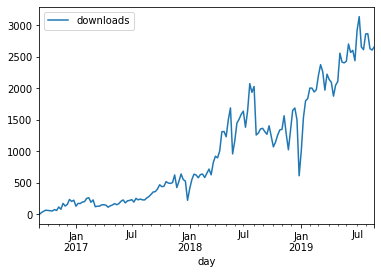

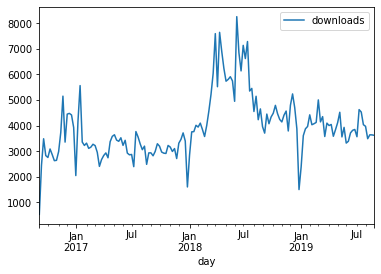

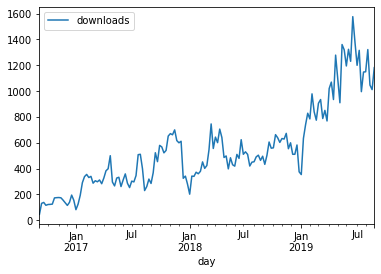

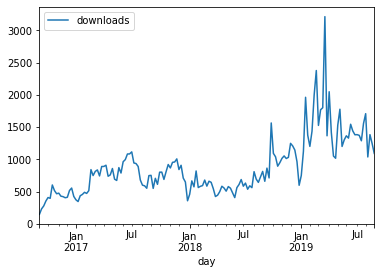

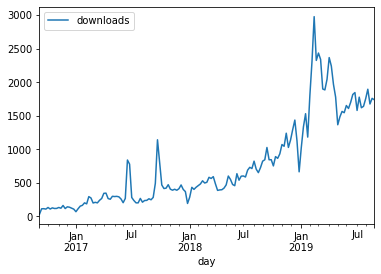

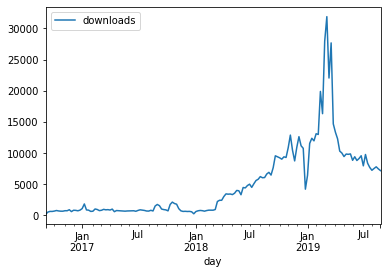

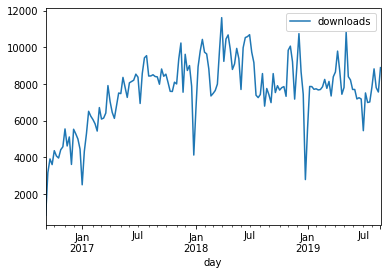

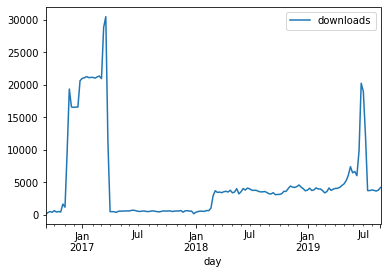

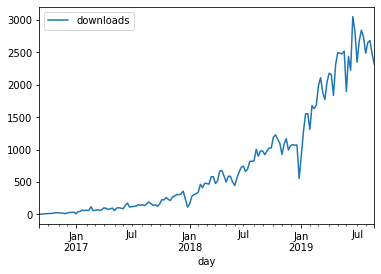

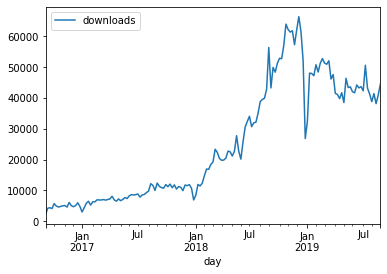

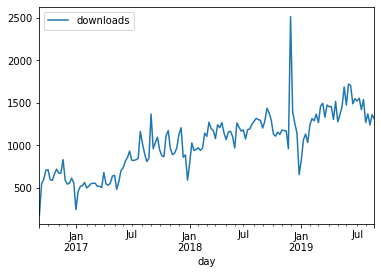

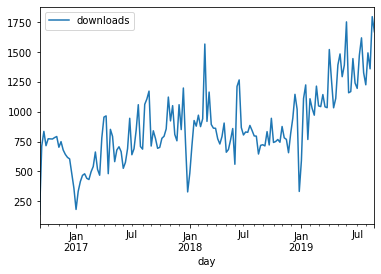

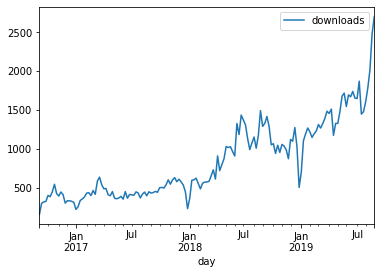

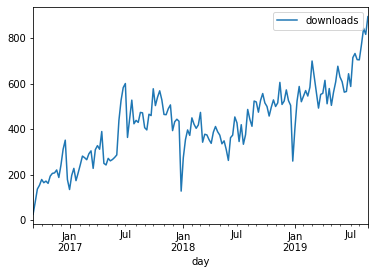

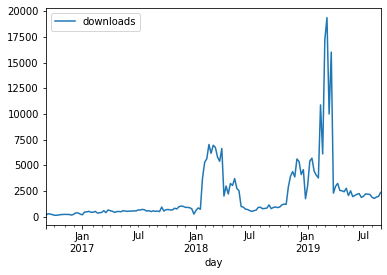

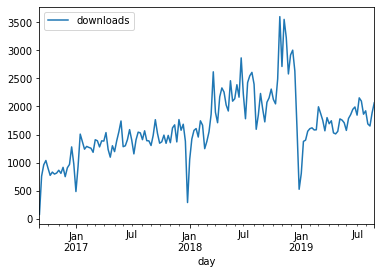

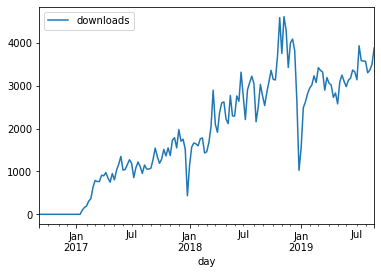

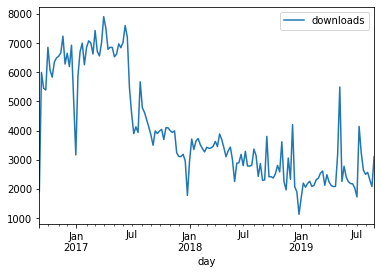

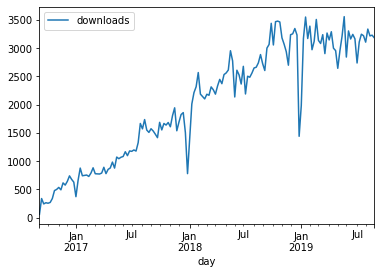

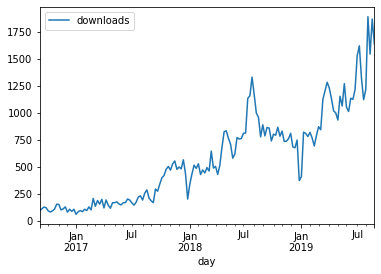

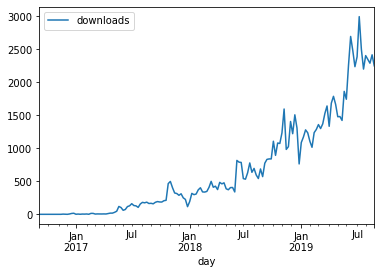

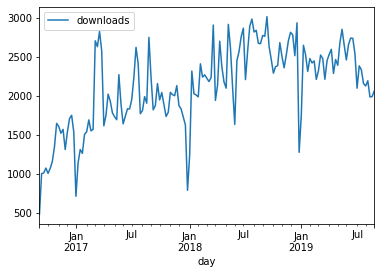

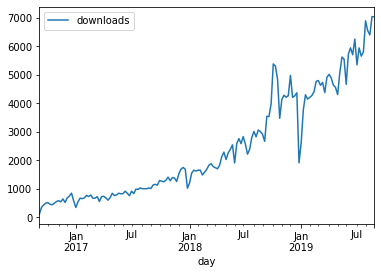

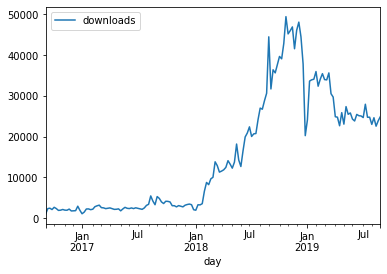

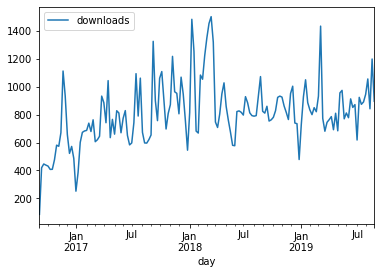

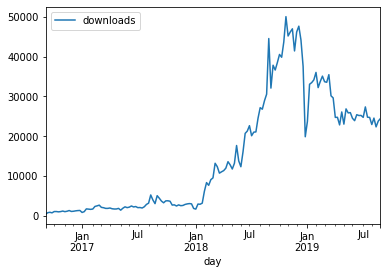

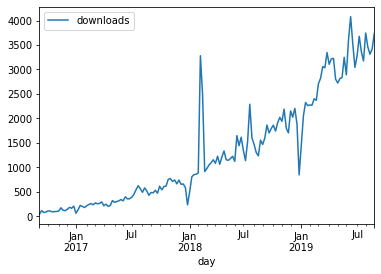

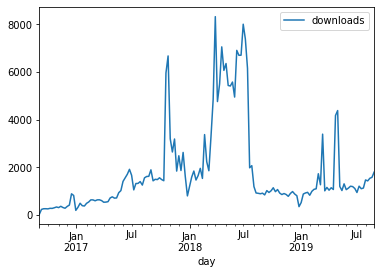

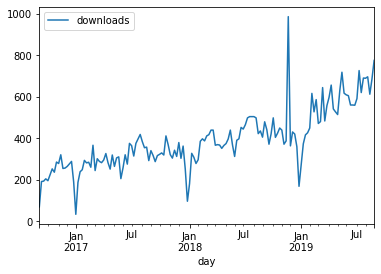

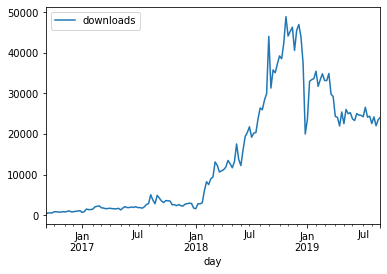

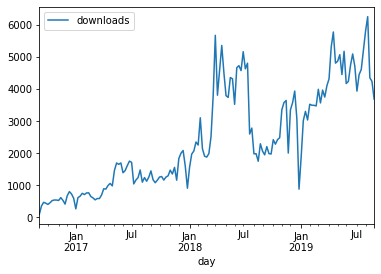

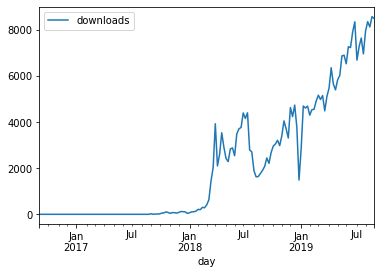

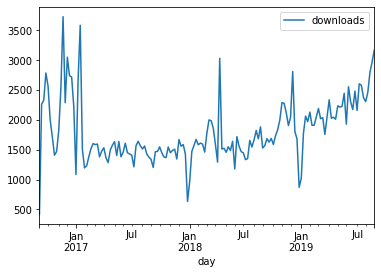

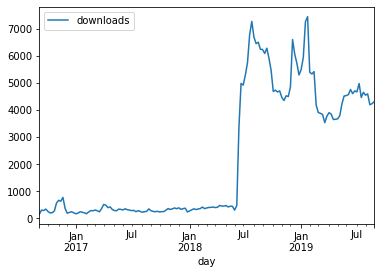

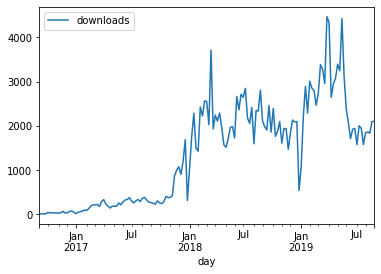

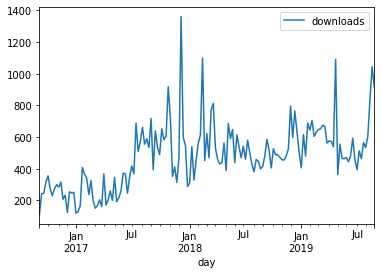

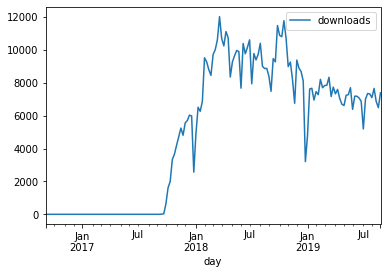

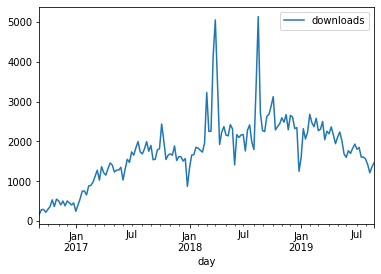

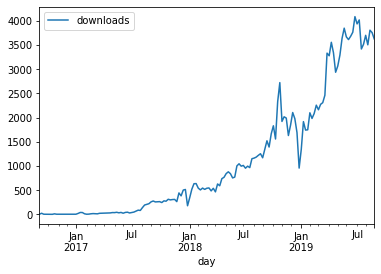

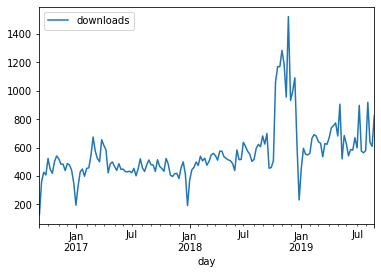

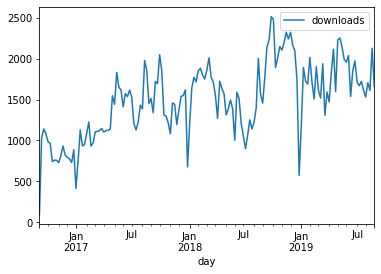

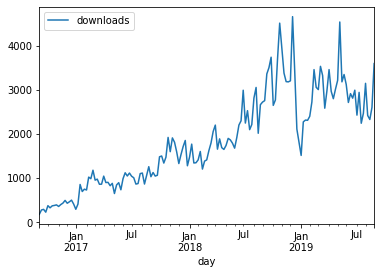

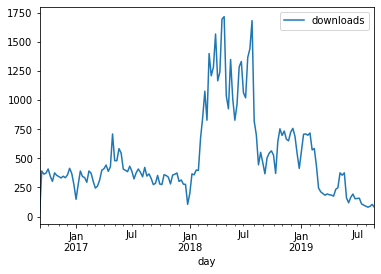

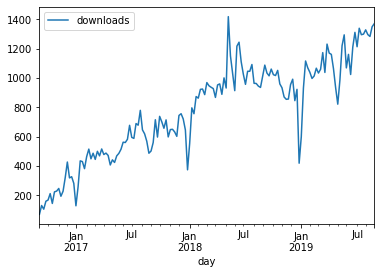

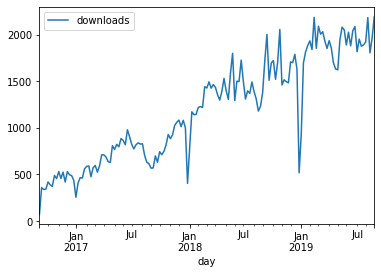

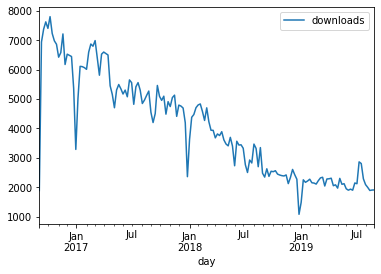

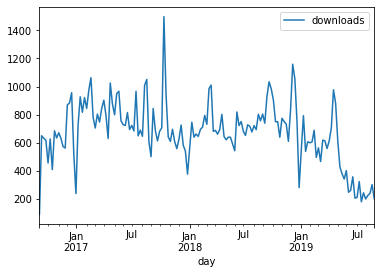

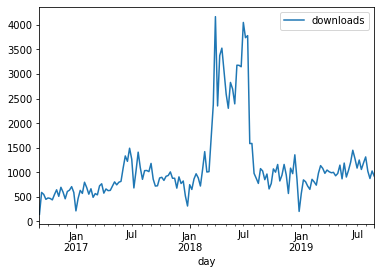

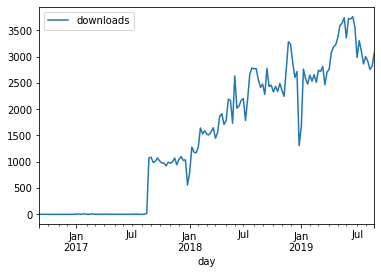

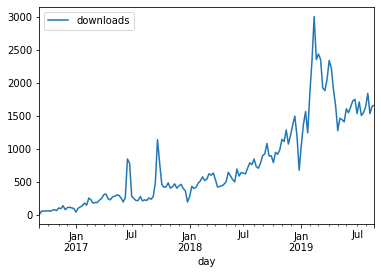

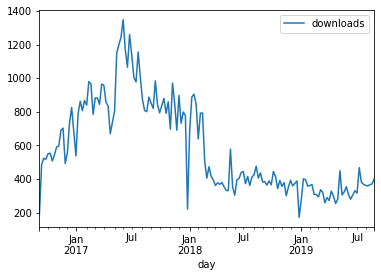

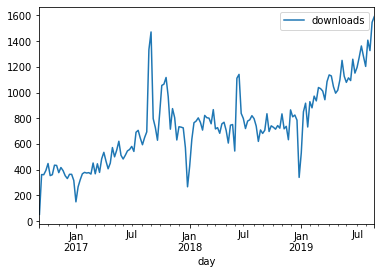

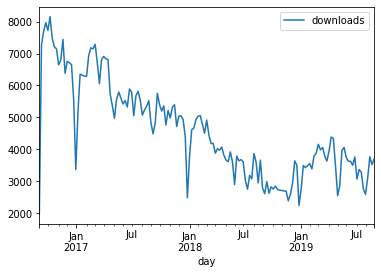

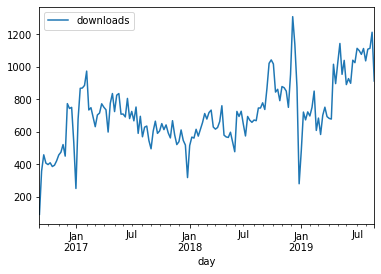

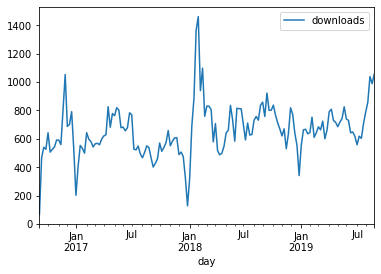

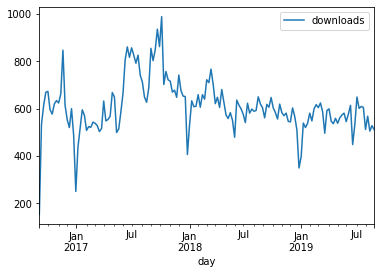

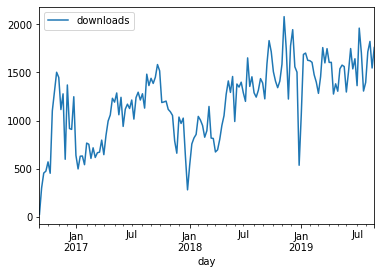

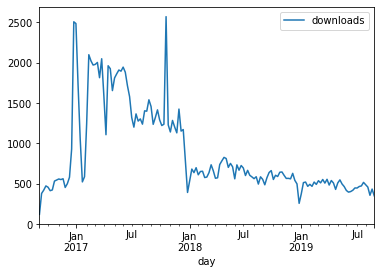

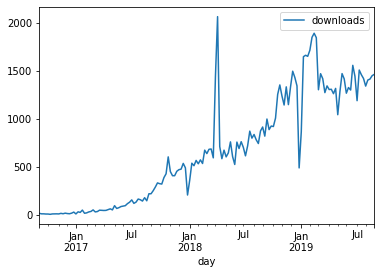

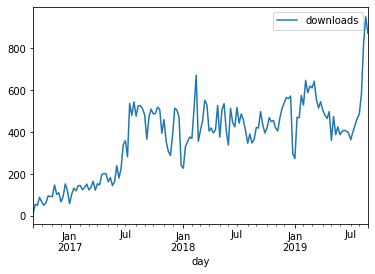

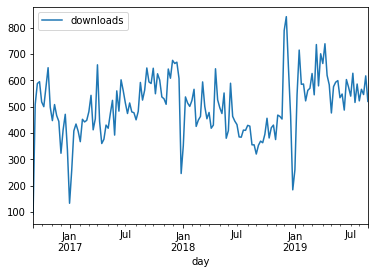

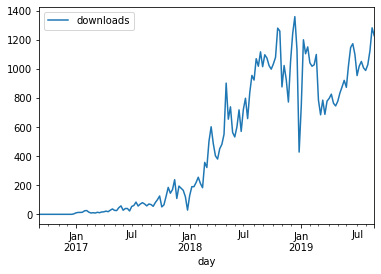

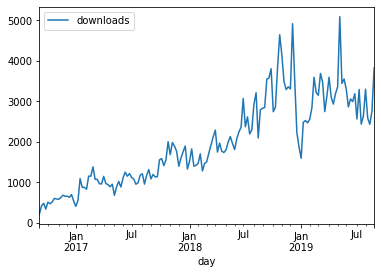

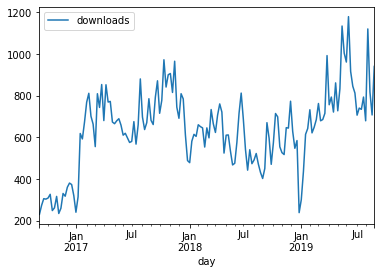

Error in callback <function flush_figures at 0x10b2deb70> (for post_execute):


KeyboardInterrupt: 

In [135]:
# assets =  pd.read_json('../data/assets/means1over_testing.json')
assets =  pd.read_json('../data/assets/over300testing.json')

means1overPackages = assets['packages']
for i in means1overPackages:
    df = convert_week_datetime(i)
    df.plot()

In [182]:
# assets =  pd.read_json('../data/assets/means1over_testing.json')
assets =  pd.read_json('../data/assets/over300testing.json')
means1overPackages = assets['packages']

packagesLengths = len(assets)
print(packagesLengths)
X_train = np.empty([52, 1])
for i in means1overPackages:
    ts = convert_ts(i)
    ts = ts.trend[26:130]
    ts = [int(s) for s in ts]
#     if i == 'jest':
#         print(ts)
    ary = np.array(ts)
    split = np.split(ary, 2)
    tail = split[1]
    zouka = tail[51] / tail[0]
    if zouka < 1:
        continue
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(tail)
#     print(d[0])
    X_train = np.concatenate([X_train, d[0]])
#     print(X_train)

print(X_train.shape)

149
(6760, 1)


In [72]:
X_train
x = np.split(X_train, packagesLengths)
x = np.array(x)
print(x)

[[[ 0.00000000e+000]
  [ 2.13412571e+257]
  [ 6.92732864e-310]
  ...
  [ 1.61410559e+132]
  [ 9.89803615e+164]
  [ 4.50620798e-144]]

 [[ 9.45956265e-076]
  [ 1.16543197e+166]
  [ 2.56918372e+161]
  ...
  [ 9.89803615e+164]
  [ 9.16281387e-072]
  [ 2.13446945e+257]]

 [[ 6.61020367e-062]
  [ 2.31000896e-052]
  [ 1.61410559e+132]
  ...
  [ 7.35281612e+223]
  [ 9.89803615e+164]
  [ 1.42137836e-076]]

 ...

 [[-1.03042691e+000]
  [-1.03042691e+000]
  [-1.03042691e+000]
  ...
  [ 1.68684559e+000]
  [ 1.81984934e+000]
  [ 2.01935496e+000]]

 [[ 2.15235870e+000]
  [ 2.28536245e+000]
  [ 2.25815696e+000]
  ...
  [ 4.08957559e-001]
  [ 4.08957559e-001]
  [ 4.08957559e-001]]

 [[ 4.08957559e-001]
  [ 1.94873411e+000]
  [ 1.94873411e+000]
  ...
  [-1.07115848e+000]
  [-1.07115848e+000]
  [-1.07115848e+000]]]


(130, 52, 1)
4.643 --> 3.672 --> 3.616 --> 3.601 --> 3.599 --> 3.599 --> 


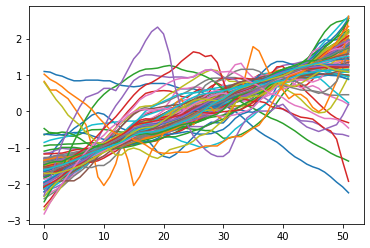

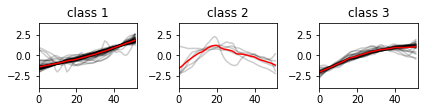

In [183]:
# x = np.split(X_train, packagesLengths + 1)
x = np.split(X_train, 130)

x = np.array(x)

print(x.shape)

for i in x:
    plt.plot(i)

sz = x.shape[1]
seed = 0
np.random.seed(seed)
cluster_num = 3
km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=True, random_state=seed)
y_pred = km.fit_predict(x)


plt.figure()
for yi in range(cluster_num):
    plt.subplot(3, 3, yi + 1)
    for xx in x[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        ab = np.linalg.norm(km.cluster_centers_[yi].ravel() - xx.ravel())
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("class 1")

    if yi == 1:
        plt.title("class 2")
        
    if yi == 2:
        plt.title("class 3")


plt.tight_layout()
plt.show()

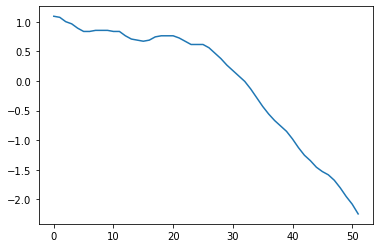

In [190]:
plt.plot(x[0])

In [189]:
for i in y_pred:
        print(i)

1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
2
2
0
2
0
0
0
0
0
0
2
0
0
2
2
0
0
0
0
2
0
0
0
2
2
2
2
0
0
0
0
0
0
0
0
2
0
0
0
0
2
1
2
2
0
0
2
0
2
2
0
0
2
2
0
0
2
2
0
1
1
0
2
0
2
2
2
0
0
0
0
1
2
0
2
0
2
2
0
0
2
2
0
2
0
2
0


In [161]:
assets =  pd.read_json('../data/assets/over300testing.json')
# assets =  pd.read_json('../data/assets/TrueClassTesting.json')
means1overPackages = assets['packages']

packagesLengths = len(assets)
print(packagesLengths)
Y_train = np.empty([52, 1])
for i in means1overPackages:
    #     print(i)
    ts = convert_ts(i)
    ts = ts.trend[26:130]
    ts = [int(s) for s in ts]
    ary = np.array(ts)
    split = np.split(ary, 2)
    tail = split[1]
    zouka = tail[51] / tail[0]
    median = np.median(tail)
#     if median < 0:
#         plt.plot(median)
#     print(median)
    print(zouka)
#     print(head.shape)
#     d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(head).flatten()
#     model = ARIMA(head , (5, 2, 1))
#     result = model.fit()
#     predict = result.predict(2, 105, typ="levels")
#     tail = np.split(predict, 2)[1]
#     plt.plot(tail)
#     print(d[0])
#     Y_train = np.concatenate([Y_train, d[0]])
#     print(X_train)

print(Y_train.shape)

148
1.5164362143939023
2.946927271613259
1.3873602056602756
2.85535648062303
1.903022741450689
1.2955726875769742
1.956844891476972
1.9505460816248323
4.016867640298455
1.6201586024594874
1.5462955052446723
3.2906260136230943
1.4351411572829806
2.4324017444711106
1.3141185520151046
3.430898321816387
6.644965013690295
2.3934027439914374
1.7238184370613008
1.8577363461343601
1.9490060501296456
1.151493139628733
11.339585539252761
2.118225650916104
3.0007017426609415
1.9113588471212017
1.0881743672881203
2.5850148999574287
1.0455637970692373
1.2972017526389166
2.8262316196200494
1.5512370248965894
1.2819920844327177
1.8454119431427072
1.9803261398669478
1.6079905646469115
1.3797253634894993
1.1528648164726947
4.323405746320953
2.695149592021759
2.2839413313275667
1.2028295279450905
2.905611562137568
2.0822199383350464
1.3457964601769912
1.3938983050847458
1.6391470214222832
1.7338886854632003
2.547160243407708
1.354066985645933
1.0983278261740261
1.0344435418359057
2.3074233458848843
0.99

In [ ]:
y = np.split(Y_train, packagesLengths + 1)
y = np.array(x)

print(y.shape)

for i in y:
    plt.plot(i)

sz = y.shape[1]
seed = 0
np.random.seed(seed)
cluster_num = 2
km = TimeSeriesKMeans(n_clusters=cluster_num, verbose=True, random_state=seed)
y_pred = km.fit_predict(y)


plt.figure()
for yi in range(cluster_num):
    plt.subplot(3, 3, yi + 1)
    for xx in y[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
        ab = np.linalg.norm(km.cluster_centers_[yi].ravel() - xx.ravel())
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
#     if yi == 1:
#         plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()